# Plot of the Stretching

In [1]:
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from example_plotter import hessian_blocks

from sith import variables4tests as vt
from sith import SITH
import matplotlib.pyplot as plt
import numpy as np

import cmocean as cmo

cmap = cmo.cm.algae

# sith = SITH(AAA / 'forces')
sith = SITH(vt.G)
sith.killer(killElements='H')
energies1, e_dis1 = sith.sith_analysis(); # This step is repeated leater only for ilustration proporsals
energies2, e_dis2 = sith.jedi_analysis();

# SITH basic attributes

- Number of stretched structures.

In [2]:
sith.n_structures

9

- The attribute dims contain the number of DOFs, and separate this amount into number of distances, number of angles and number of dihedrals. 

In [3]:
sith.dims

array([18,  8,  7,  3])

# DOFs

SITH reads all the information about the DOFs. Let's explore some of them in the next cells.

- Definition of the DOFs involved in the analysis. The description of the DOFs are given as the atom indexes, which start from 1 instead of 0 as gaussian convention. The definition of each DOF has 4 indexes: 0 means None, namely, the DOFs with two zeros are bonds; DOFs with one zero are angles; DOFs without zeros are dihedrals.

- The value of each DOF. The unit of distances is Angstrom, angles are in radians. Note that dihedrals jump from -$\pi$ to $\pi$ or the other way around. The reason is not a discontinuity in the changes of DOFs, but the periodicity of angles.

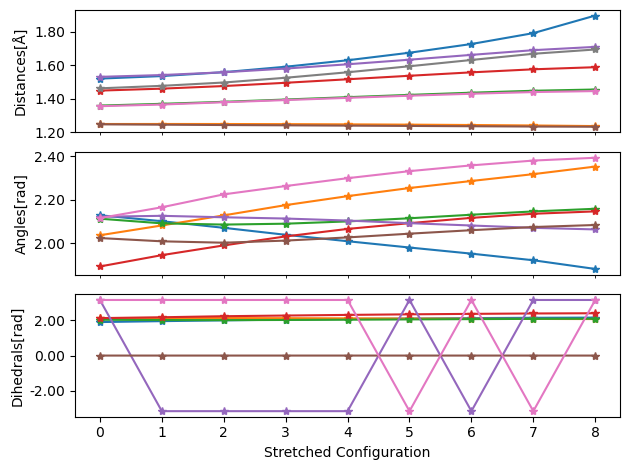

In [4]:
fig, axes = plt.subplots(3, 1)

axes[0].plot(sith.all_dofs[:, :sith.dims[1]], '-*');
axes[1].plot(sith.all_dofs[:, sith.dims[1]: sith.dims[1] + sith.dims[2]], '-*');
axes[2].plot(sith.all_dofs[:, -sith.dims[2]:], '-*');


axes[2].set_xlabel('Stretched Configuration')
axes[0].set_ylabel('Distances[Å]')
axes[1].set_ylabel('Angles[rad]')
axes[2].set_ylabel('Dihedrals[rad]')

for i in [0, 1]:
    axes[i].set_xticks([])
    axes[i].set_xticks(range(len(sith.all_dofs)), minor=True)

for ax in axes.flatten():
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

plt.tight_layout()


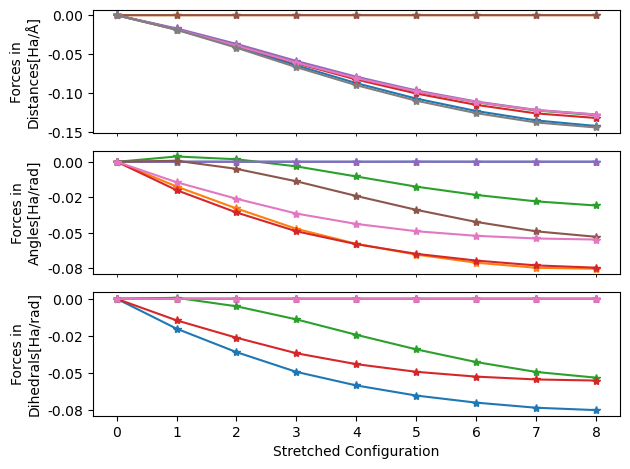

In [5]:
fig, axes = plt.subplots(3, 1)

axes[0].plot(sith.all_forces[:, :sith.dims[1]], '-*');
axes[1].plot(sith.all_forces[:, sith.dims[1]: sith.dims[1] + sith.dims[2]], '-*');
axes[2].plot(sith.all_forces[:, -sith.dims[2]:], '-*');


axes[2].set_xlabel('Stretched Configuration')
axes[0].set_ylabel('Forces in\nDistances[Ha/Å]')
axes[1].set_ylabel('Forces in\nAngles[Ha/rad]')
axes[2].set_ylabel('Forces in\nDihedrals[Ha/rad]')

for i in [0, 1]:
    axes[i].set_xticks([])
    axes[i].set_xticks(range(len(sith.all_dofs)), minor=True)

for ax in axes.flatten():
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-1, 1))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

plt.tight_layout()


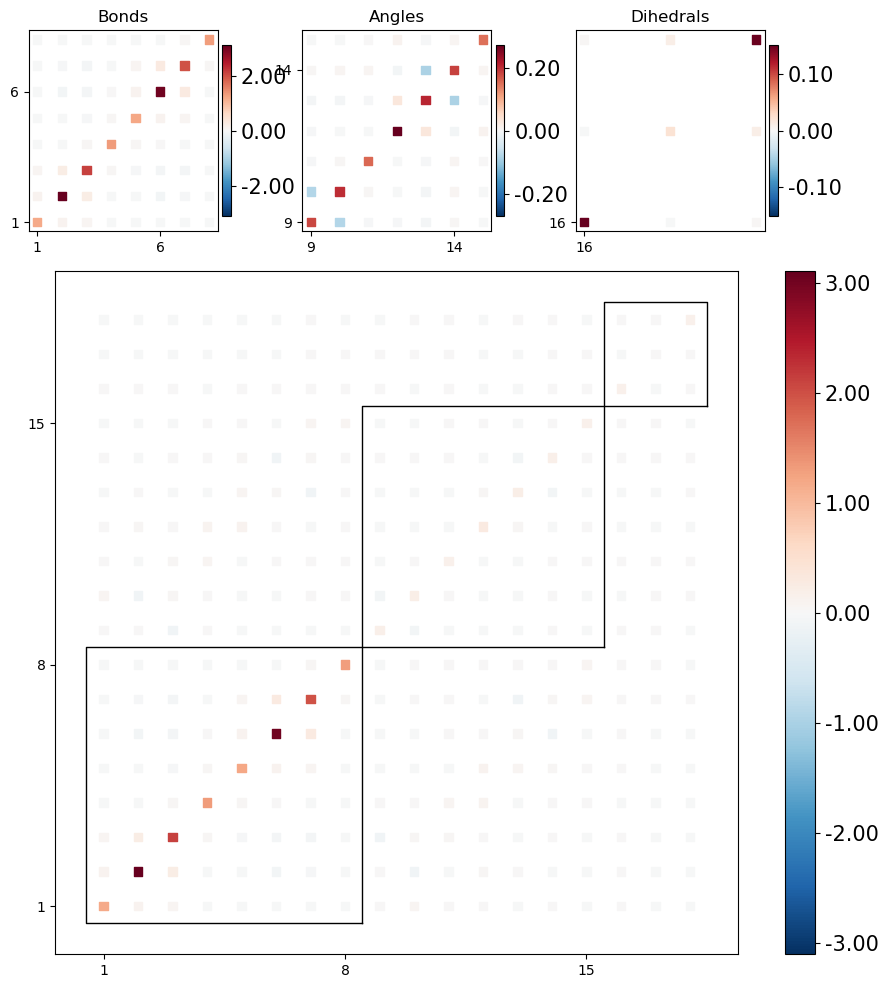

In [6]:
hessian_blocks(sith.structures[0].hessian, sith.dims, deltas=[5,5,5,7]);

# SITH Energy Analysis

In [7]:
energies1, e_dis1 = sith.sith_analysis();

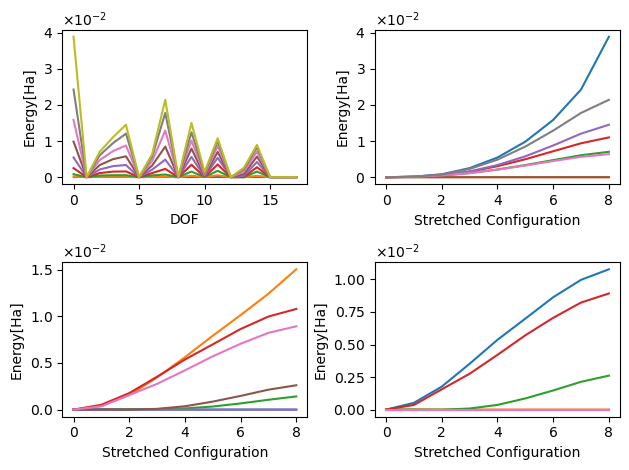

In [8]:
fig, axes = plt.subplots(2, 2)

axes[0][0].plot(e_dis1.T);
axes[0][1].plot(e_dis1[:, :sith.dims[1]]);
axes[1][0].plot(e_dis1[:, sith.dims[1]: sith.dims[1] + sith.dims[2]]);
axes[1][1].plot(e_dis1[:, -sith.dims[2]:]);

axes[0][0].set_xlabel('DOF')
axes[0][0].set_ylabel('Energy[Ha]')
for ax in [axes[0][1], axes[1][0], axes[1][1]]:
    ax.set_xlabel('Stretched Configuration')
    ax.set_ylabel('Energy[Ha]')

for ax in axes.flatten():
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-2, 2))
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Checkear units of JEDI. The distribution is prety similar but diff absolute values

# JEDI Energy Analysis

In [9]:
energies2, e_dis2 = sith.jedi_analysis();

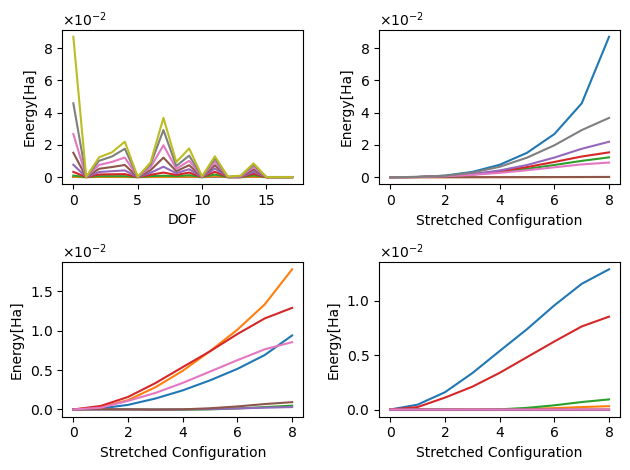

In [10]:
fig, axes = plt.subplots(2, 2)

axes[0][0].plot(e_dis2.T);
axes[0][1].plot(e_dis2[:, :sith.dims[1]]);
axes[1][0].plot(e_dis2[:, sith.dims[1]: sith.dims[1] + sith.dims[2]]);
axes[1][1].plot(e_dis2[:, -sith.dims[2]:]);

axes[0][0].set_xlabel('DOF')
axes[0][0].set_ylabel('Energy[Ha]')
for ax in [axes[0][1], axes[1][0], axes[1][1]]:
    ax.set_xlabel('Stretched Configuration')
    ax.set_ylabel('Energy[Ha]')

for ax in axes.flatten():
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-2, 2))
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Energy

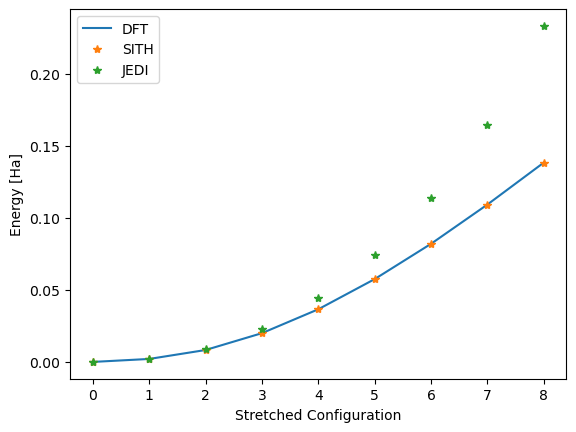

In [11]:
plt.plot(sith.structures_scf_energies, label='DFT')
plt.plot(energies1, '*', label='SITH')
plt.plot(energies2, '*', label='JEDI')
plt.xlabel('Stretched Configuration')
plt.ylabel('Energy [Ha]')
plt.legend();

# Visualization with VMol

In [12]:
from sith.visualize.vmol import EnergiesVMol as Evmol

<IPython.core.display.Javascript object>

In [13]:
v=Evmol(sith, dofs=['bonds'], cmap=cmap, absolute=True, deci=2, alignment=[1, 16, 13])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualization with NGLview

$\color{red}{\text{NGL view engine doesn't work because there is no way as (far as I could check) to change the color of the bonds on the fly}}$

In [15]:
from sith.visualize.ngl import EnergiesNGL as Engl

v = Engl(sith, background='#FFFFFF', alignment=[0, 15, 5])
v.energies_bonds(cmap=cmap);
v.show()